## Prediction Competition 3

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Load Data

In [2]:
vehicle_df = pd.read_csv('/Users/andrew/Downloads/UW courses/ECON 626/Prediction Competition 3/pc3_and_pc4_training_data_small_v1.csv')
vehicle_df


,price,back_legroom,body_type,engine_displacement,exterior_color,fuel_type,height,highway_fuel_economy,horsepower,latitude,length,listed_date,longitude,mileage,wheel_system,wheelbase,width,year
0,18495.0,44.5 in,Pickup Truck,5700,MAROON,Gasoline,75.6 in,18,381,32.803101,228.7 in,2020-09-02,-96.779701,167184,4X2,145.7 in,79.9 in,2008
1,16422.0,41.4 in,Sedan,1800,Black Sand Pearl,Gasoline,57.3 in,38,132,38.371700,182.6 in,2020-07-25,-86.958900,29451,FWD,106.3 in,69.9 in,2016
2,39935.0,36.5 in,Sedan,2000,JET BLACK,Gasoline,58.2 in,34,248,34.137100,194.6 in,2020-08-08,-118.255000,14984,RWD,117.1 in,83.7 in,2019
3,23949.0,38.7 in,SUV / Crossover,3500,Brilliant Silver,Gasoline,67.8 in,28,260,34.064899,192.8 in,2020-06-21,-81.143600,15697,FWD,111.2 in,75.4 in,2020
4,37545.0,35.2 in,Sedan,2000,Black,Gasoline,56.3 in,33,255,38.899200,184.5 in,2020-09-06,-77.461800,6907,AWD,111.8 in,79.4 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,41008.0,39.7 in,SUV / Crossover,5300,Green,Gasoline,74.4 in,22,355,35.101898,224.4 in,2020-08-29,-77.092499,47980,4WD,130 in,80.5 in,2018
99996,13933.0,35.1 in,Sedan,2000,Alpine White,Gasoline,56.3 in,33,240,42.767601,182.5 in,2020-08-12,-73.814301,98430,AWD,110.6 in,80 in,2013
99997,5597.0,36.2 in,Hatchback,2400,Silver,Gasoline,61 in,29,158,35.358799,171.1 in,2020-06-27,-86.202599,114428,FWD,102.4 in,69.5 in,2010
99998,8942.0,35.6 in,SUV / Crossover,2500,White,Gasoline,67.8 in,27,171,40.054401,174.7 in,2020-08-16,-74.892197,63256,AWD,103.1 in,81.3 in,2012


In [3]:
large_df = pd.read_csv('/Users/andrew/Downloads/UW courses/ECON 626/Prediction Competition 3/pc3_and_pc4_training_data_large_v1.csv')
large_df

,price,back_legroom,body_type,engine_displacement,exterior_color,fuel_type,height,highway_fuel_economy,horsepower,latitude,length,listed_date,longitude,mileage,wheel_system,wheelbase,width,year
0,17990.0,37.3 in,SUV / Crossover,2000,Magnetic Metallic,Gasoline,66.3 in,28,245,43.037601,178.1 in,2020-08-09,-76.403702,31105,AWD,105.9 in,81.8 in,2017
1,28000.0,41 in,SUV / Crossover,5600,Black,Gasoline,75.8 in,19,390,33.766800,208.9 in,2020-08-21,-117.955000,32832,4X2,121.1 in,79.9 in,2019
2,8495.0,36.5 in,Minivan,3600,Charcoal,Flex Fuel Vehicle,67.9 in,25,283,40.494301,202.8 in,2020-07-26,-79.930000,116921,FWD,121.2 in,88.5 in,2012
3,15900.0,32.7 in,Hatchback,1800,Black,Gasoline,55.3 in,36,137,34.080299,170.5 in,2020-09-07,-117.725000,30933,FWD,102.4 in,69.3 in,2017
4,11495.0,35.7 in,SUV / Crossover,1400,Blue,Gasoline,65.9 in,34,138,35.538200,167.2 in,2020-08-14,-98.657204,85217,FWD,100.6 in,69.9 in,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,8477.0,39.4 in,SUV / Crossover,2400,Gray,Gasoline,65.7 in,26,172,42.496899,173.6 in,2020-07-29,-71.069298,102204,4WD,103.7 in,69.1 in,2012
499996,17998.0,36.3 in,SUV / Crossover,2400,Black,Gasoline,64.8 in,29,168,29.785700,171.9 in,2020-08-14,-95.741997,34234,FWD,105.1 in,71.3 in,2018
499997,29500.0,38.6 in,SUV / Crossover,3600,Billet Silver Metallic Clear Coat,Gasoline,69.3 in,25,295,40.422298,189.8 in,2020-08-03,-74.190300,38511,4WD,114.8 in,84.8 in,2018
499998,48000.0,--,Convertible,6200,Arctic White,Gasoline,48.9 in,29,455,41.468201,176.9 in,2020-08-27,-87.355301,9073,RWD,106.7 in,73.9 in,2016


In [4]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 100000 non-null  float64
 1   back_legroom          100000 non-null  object 
 2   body_type             100000 non-null  object 
 3   engine_displacement   100000 non-null  int64  
 4   exterior_color        97934 non-null   object 
 5   fuel_type             100000 non-null  object 
 6   height                100000 non-null  object 
 7   highway_fuel_economy  100000 non-null  int64  
 8   horsepower            100000 non-null  int64  
 9   latitude              100000 non-null  float64
 10  length                100000 non-null  object 
 11  listed_date           100000 non-null  object 
 12  longitude             100000 non-null  float64
 13  mileage               100000 non-null  int64  
 14  wheel_system          100000 non-null  object 
 15  w

In [5]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 500000 non-null  float64
 1   back_legroom          500000 non-null  object 
 2   body_type             500000 non-null  object 
 3   engine_displacement   500000 non-null  int64  
 4   exterior_color        489860 non-null  object 
 5   fuel_type             500000 non-null  object 
 6   height                500000 non-null  object 
 7   highway_fuel_economy  500000 non-null  int64  
 8   horsepower            500000 non-null  int64  
 9   latitude              500000 non-null  float64
 10  length                500000 non-null  object 
 11  listed_date           500000 non-null  object 
 12  longitude             500000 non-null  float64
 13  mileage               500000 non-null  int64  
 14  wheel_system          500000 non-null  object 
 15  

In [6]:
total_df = pd.concat([large_df, vehicle_df], axis = 0)

In [7]:
total_df.tail()

,price,back_legroom,body_type,engine_displacement,exterior_color,fuel_type,height,highway_fuel_economy,horsepower,latitude,length,listed_date,longitude,mileage,wheel_system,wheelbase,width,year
99995,41008.0,39.7 in,SUV / Crossover,5300,Green,Gasoline,74.4 in,22,355,35.101898,224.4 in,2020-08-29,-77.092499,47980,4WD,130 in,80.5 in,2018
99996,13933.0,35.1 in,Sedan,2000,Alpine White,Gasoline,56.3 in,33,240,42.767601,182.5 in,2020-08-12,-73.814301,98430,AWD,110.6 in,80 in,2013
99997,5597.0,36.2 in,Hatchback,2400,Silver,Gasoline,61 in,29,158,35.358799,171.1 in,2020-06-27,-86.202599,114428,FWD,102.4 in,69.5 in,2010
99998,8942.0,35.6 in,SUV / Crossover,2500,White,Gasoline,67.8 in,27,171,40.054401,174.7 in,2020-08-16,-74.892197,63256,AWD,103.1 in,81.3 in,2012
99999,10990.0,34.5 in,Hatchback,1500,Blue,Gasoline,60 in,33,117,44.882900,161.6 in,2020-08-18,-93.080498,76035,FWD,98.4 in,66.7 in,2013


In [8]:
#vehicle_df.tail()

The tails are the same therefore we have concatinated correctly!

In [9]:
total_df['under_19500'] = (total_df['price'] < 19500).astype(int)
total_df.head()

,price,back_legroom,body_type,engine_displacement,exterior_color,fuel_type,height,highway_fuel_economy,horsepower,latitude,length,listed_date,longitude,mileage,wheel_system,wheelbase,width,year,under_19500
0,17990.0,37.3 in,SUV / Crossover,2000,Magnetic Metallic,Gasoline,66.3 in,28,245,43.037601,178.1 in,2020-08-09,-76.403702,31105,AWD,105.9 in,81.8 in,2017,1
1,28000.0,41 in,SUV / Crossover,5600,Black,Gasoline,75.8 in,19,390,33.766800,208.9 in,2020-08-21,-117.955000,32832,4X2,121.1 in,79.9 in,2019,0
2,8495.0,36.5 in,Minivan,3600,Charcoal,Flex Fuel Vehicle,67.9 in,25,283,40.494301,202.8 in,2020-07-26,-79.930000,116921,FWD,121.2 in,88.5 in,2012,1
3,15900.0,32.7 in,Hatchback,1800,Black,Gasoline,55.3 in,36,137,34.080299,170.5 in,2020-09-07,-117.725000,30933,FWD,102.4 in,69.3 in,2017,1
4,11495.0,35.7 in,SUV / Crossover,1400,Blue,Gasoline,65.9 in,34,138,35.538200,167.2 in,2020-08-14,-98.657204,85217,FWD,100.6 in,69.9 in,2015,1


### Data cleaning

In [10]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 600000 non-null  float64
 1   back_legroom          600000 non-null  object 
 2   body_type             600000 non-null  object 
 3   engine_displacement   600000 non-null  int64  
 4   exterior_color        587794 non-null  object 
 5   fuel_type             600000 non-null  object 
 6   height                600000 non-null  object 
 7   highway_fuel_economy  600000 non-null  int64  
 8   horsepower            600000 non-null  int64  
 9   latitude              600000 non-null  float64
 10  length                600000 non-null  object 
 11  listed_date           600000 non-null  object 
 12  longitude             600000 non-null  float64
 13  mileage               600000 non-null  int64  
 14  wheel_system          600000 non-null  object 
 15  wheelb

Here we see we have a lot of variables and not all will be useful in predicting the price. Using domain knowledge I will drop the following columns to not use any invaluable variables in our prediction:
latitude: This column tells use the lat of the dealership that sells the car since we are not mapping the location of the dealership in a geographical space the lat and long of the dealership variable will not be a good predictor and may hurt our model
longitude: same as lat
listed_date: The date of the listing wont effect the price of the car very much compared to the other variables we have in the dataset
length, height and width: While very important many buyers dont use these measures to justify the price of the car but rather a variable that correlates heavily with these stats, the body type. 
wheelbase: car's wheelbase is the distance between the centres of the front and rear wheels. While important for many components of a car it is not important for predicting the price.
back_legroom: Could be a important factor however for the reason of classify cars in two classes (under and above 19500) I will be removing this column

In [11]:
drop = ['price', 'width', 'length', 'height', 'wheelbase', 'back_legroom', 'latitude', 'longitude', 'listed_date', 'exterior_color']
for col in drop:
    total_df = total_df.drop([col], axis=1)


In [12]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   body_type             600000 non-null  object
 1   engine_displacement   600000 non-null  int64 
 2   fuel_type             600000 non-null  object
 3   highway_fuel_economy  600000 non-null  int64 
 4   horsepower            600000 non-null  int64 
 5   mileage               600000 non-null  int64 
 6   wheel_system          600000 non-null  object
 7   year                  600000 non-null  int64 
 8   under_19500           600000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 45.8+ MB


In [13]:
total_df['fuel_type'].unique()

array(['Gasoline', 'Flex Fuel Vehicle', 'Hybrid', 'Diesel', 'Biodiesel',
       'Compressed Natural Gas'], dtype=object)

In [14]:
total_df['fuel_type'].value_counts()

fuel_type
Gasoline                  549201
Flex Fuel Vehicle          35888
Hybrid                     11362
Diesel                      3001
Biodiesel                    531
Compressed Natural Gas        17
Name: count, dtype: int64

Since the fuel type includes Gasoline, hybrids and diesels I believe it is important so we will be encoding this column. For improvement of our encoding predictions I will drop the biodeisel and Compressed Natural Gas since they make up such a small portion of the data

In [15]:
total_df = total_df[(total_df['fuel_type'] != 'Biodiesel') & (total_df['fuel_type'] != 'Compressed Natural Gas')]

In [16]:
total_df['fuel_type'].unique()

array(['Gasoline', 'Flex Fuel Vehicle', 'Hybrid', 'Diesel'], dtype=object)

In [17]:
total_df['wheel_system'].unique()

array(['AWD', '4X2', 'FWD', '4WD', 'RWD'], dtype=object)

In [18]:
total_df['wheel_system'].value_counts()

wheel_system
FWD    280564
AWD    154363
4WD     96618
RWD     47882
4X2     20025
Name: count, dtype: int64

In [19]:
total_df['body_type'].unique()

array(['SUV / Crossover', 'Minivan', 'Hatchback', 'Sedan', 'Pickup Truck',
       'Convertible', 'Coupe', 'Wagon', 'Van'], dtype=object)

In [20]:
total_df['body_type'].value_counts()

body_type
SUV / Crossover    269733
Sedan              187793
Pickup Truck        59726
Minivan             21006
Hatchback           18387
Coupe               18021
Wagon               13859
Convertible          7712
Van                  3215
Name: count, dtype: int64

For body_type and wheel_system all have significance so we will just encode. But first lets check for NA's

In [21]:
data_cols = total_df.columns
for i in range(1,len(data_cols)):
    if total_df[data_cols[i]].isnull().values.any() == True:
        print(data_cols[i] + " has a nan value!")
        #total_df = total_df.drop(data_cols[i], axis=1)
    else:
       print(data_cols[i] + " does not have a nan value")

engine_displacement does not have a nan value
fuel_type does not have a nan value
highway_fuel_economy does not have a nan value
horsepower does not have a nan value
mileage does not have a nan value
wheel_system does not have a nan value
year does not have a nan value
under_19500 does not have a nan value


No NA values we can continue with encoding now that we have a cleaned dataset

In [22]:
col_encode = [ 'body_type', 'fuel_type', 'wheel_system']
for col in col_encode:
    print(total_df[col].value_counts() )

body_type
SUV / Crossover    269733
Sedan              187793
Pickup Truck        59726
Minivan             21006
Hatchback           18387
Coupe               18021
Wagon               13859
Convertible          7712
Van                  3215
Name: count, dtype: int64
fuel_type
Gasoline             549201
Flex Fuel Vehicle     35888
Hybrid                11362
Diesel                 3001
Name: count, dtype: int64
wheel_system
FWD    280564
AWD    154363
4WD     96618
RWD     47882
4X2     20025
Name: count, dtype: int64


In [23]:
# from pandas import get_dummies
# for col in col_encode:
#     total_df = pd.concat([total_df,pd.get_dummies(total_df[col], prefix=col, drop_first= True, dtype=int)],axis = 1)
# total_df.head()

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in col_encode:
    new_col = col+'_enc'
    total_df[new_col] = le.fit_transform(total_df[col])
    print(col, le.classes_)

body_type ['Convertible' 'Coupe' 'Hatchback' 'Minivan' 'Pickup Truck'
 'SUV / Crossover' 'Sedan' 'Van' 'Wagon']
fuel_type ['Diesel' 'Flex Fuel Vehicle' 'Gasoline' 'Hybrid']
wheel_system ['4WD' '4X2' 'AWD' 'FWD' 'RWD']


In [25]:
for col in col_encode:
    print(total_df[[col,col+'_enc']].drop_duplicates().sort_values(by = [col+'_enc']))

           body_type  body_type_enc
13       Convertible              0
29             Coupe              1
3          Hatchback              2
2            Minivan              3
10      Pickup Truck              4
0    SUV / Crossover              5
5              Sedan              6
201              Van              7
56             Wagon              8
             fuel_type  fuel_type_enc
289             Diesel              0
2    Flex Fuel Vehicle              1
0             Gasoline              2
200             Hybrid              3
   wheel_system  wheel_system_enc
10          4WD                 0
1           4X2                 1
0           AWD                 2
2           FWD                 3
13          RWD                 4


I would also like to change the engine displacement into a float of the litres.

In [26]:
total_df['litres'] = (total_df['engine_displacement']/1000).astype(float)
total_df['litres']

0        2.0
1        5.6
2        3.6
3        1.8
4        1.4
        ... 
99995    5.3
99996    2.0
99997    2.4
99998    2.5
99999    1.5
Name: litres, Length: 599452, dtype: float64

In [27]:
total_df = total_df.drop(['engine_displacement'], axis=1)

In [28]:
total_df.head()

,body_type,fuel_type,highway_fuel_economy,horsepower,mileage,wheel_system,year,under_19500,body_type_enc,fuel_type_enc,wheel_system_enc,litres
0,SUV / Crossover,Gasoline,28,245,31105,AWD,2017,1,5,2,2,2.0
1,SUV / Crossover,Gasoline,19,390,32832,4X2,2019,0,5,2,1,5.6
2,Minivan,Flex Fuel Vehicle,25,283,116921,FWD,2012,1,3,1,3,3.6
3,Hatchback,Gasoline,36,137,30933,FWD,2017,1,2,2,3,1.8
4,SUV / Crossover,Gasoline,34,138,85217,FWD,2015,1,5,2,3,1.4


Since we encoded the variables we can drop the original columns.

In [29]:
drop = ['body_type', 'fuel_type', 'wheel_system']
for col in drop:
    total_df = total_df.drop([col], axis=1)

In [30]:
scaler = StandardScaler(with_mean=True,
with_std=True ,
copy=True)

In [31]:
# scaler.fit(total_df['highway_fuel_economy', 'horsepower', 'mileage', 'year'])
# X_std = scaler.transform(total_df['highway_fuel_economy', 'horsepower', 'mileage', 'year'])

In [32]:
# total_std = pd.DataFrame(X_std , columns=total_df.columns);
# total_std.std()

In [33]:
total_df

,highway_fuel_economy,horsepower,mileage,year,under_19500,body_type_enc,fuel_type_enc,wheel_system_enc,litres
0,28,245,31105,2017,1,5,2,2,2.0
1,19,390,32832,2019,0,5,2,1,5.6
2,25,283,116921,2012,1,3,1,3,3.6
3,36,137,30933,2017,1,2,2,3,1.8
4,34,138,85217,2015,1,5,2,3,1.4
...,...,...,...,...,...,...,...,...,...
99995,22,355,47980,2018,0,5,2,0,5.3
99996,33,240,98430,2013,1,6,2,2,2.0
99997,29,158,114428,2010,1,2,2,3,2.4
99998,27,171,63256,2012,1,5,2,2,2.5


### Split the data

In [34]:
y = total_df['under_19500']
X = total_df.drop(columns=['under_19500'])

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=total_df['under_19500'])


In [35]:
# check dimensions
print(X_train.shape, X_test.shape)

(479561, 8) (119891, 8)


In [36]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler.fit(X_train)
# transform
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
# Initiate the model
knn = KNeighborsClassifier(n_neighbors=15)
# Fit the model on train set
knn = knn.fit(X_train_scaled,y_train)
# Predict on test set
pred_test = knn.predict(X_test_scaled)
# Calculate the accuracy score
acc = accuracy_score(y_test,pred_test)

print('The accuracy of KNN model is',acc)


The accuracy of KNN model is 0.9245898357674888


In [38]:
print(classification_report(y_test, pred_test))


              precision    recall  f1-score   support

           0       0.93      0.92      0.92     58941
           1       0.92      0.93      0.93     60950

    accuracy                           0.92    119891
   macro avg       0.92      0.92      0.92    119891
weighted avg       0.92      0.92      0.92    119891



[[53987  4954]
 [ 4087 56863]]


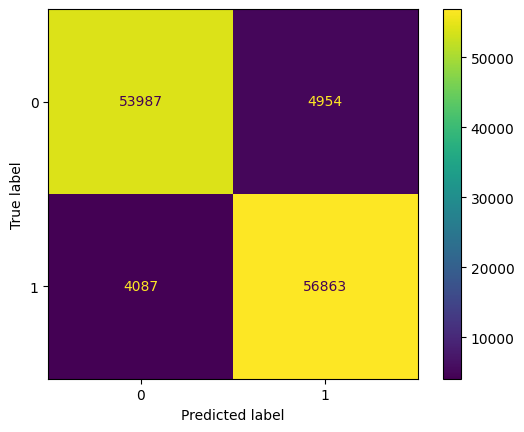

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

cm = confusion_matrix(y_test, pred_test)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the range of K values you want to try
K_values = range(1, 10)

# Initialize lists to store error rates
train_errors = []
test_errors = []

# Subset of the data
subset_size = 100000

# Loop over each K value
for K in K_values:
    # Initialize KNN classifier with current K value
    knn = KNeighborsClassifier(n_neighbors=K)
    
    # Fit the model on train set subset
    knn.fit(X_train_scaled[:subset_size], y_train[:subset_size])
    
    # Predict on train and test sets
    pred_train = knn.predict(X_train_scaled)
    pred_test = knn.predict(X_test_scaled)
    
    # Calculate error rates and append to the lists
    train_error = 1 - accuracy_score(y_train, pred_train)
    test_error = 1 - accuracy_score(y_test, pred_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot error rates against 1/K
plt.figure(figsize=(10, 6))

# Plot broken line graph with points for training error
plt.plot(1 / np.array(K_values), train_errors, linestyle='-', marker='o', label='Training Error')

# Plot broken line graph with points for test error
plt.plot(1 / np.array(K_values), test_errors, linestyle='-', marker='o', label='Test Error')

plt.title('Error Rates vs. 1/K for KNN')
plt.xlabel('1/K')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.show()


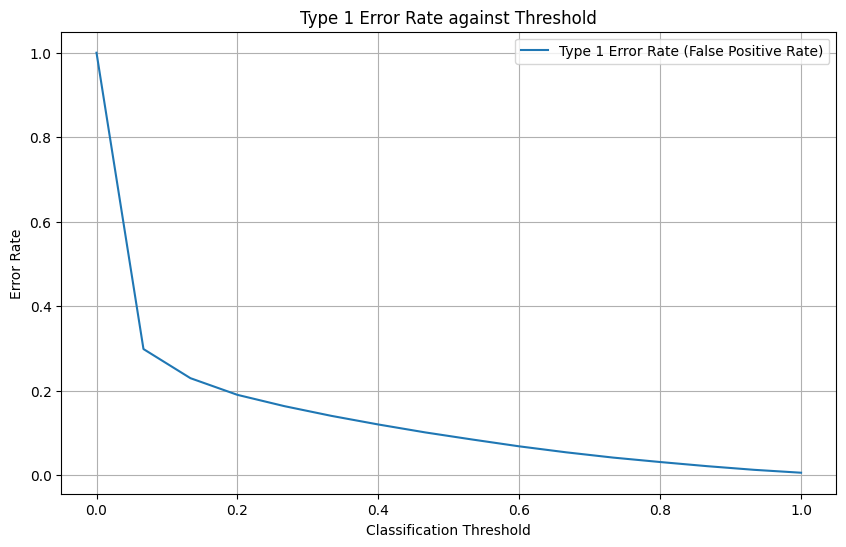

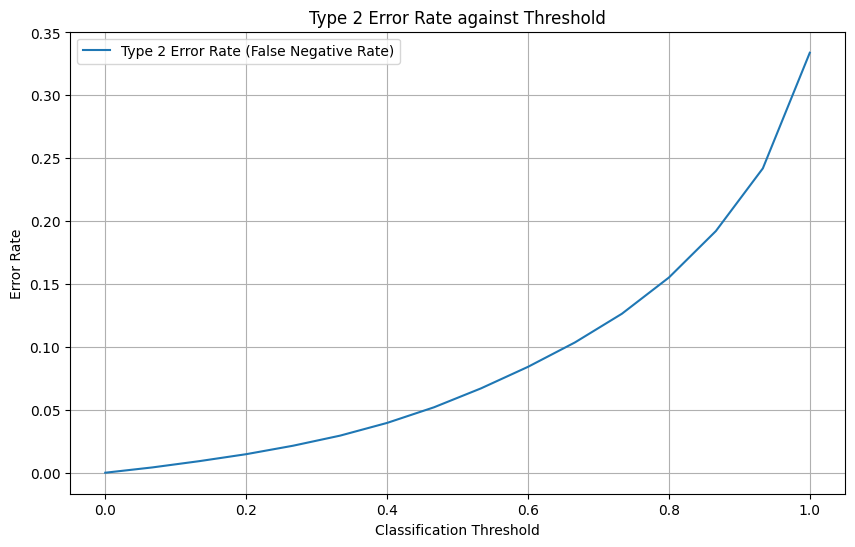

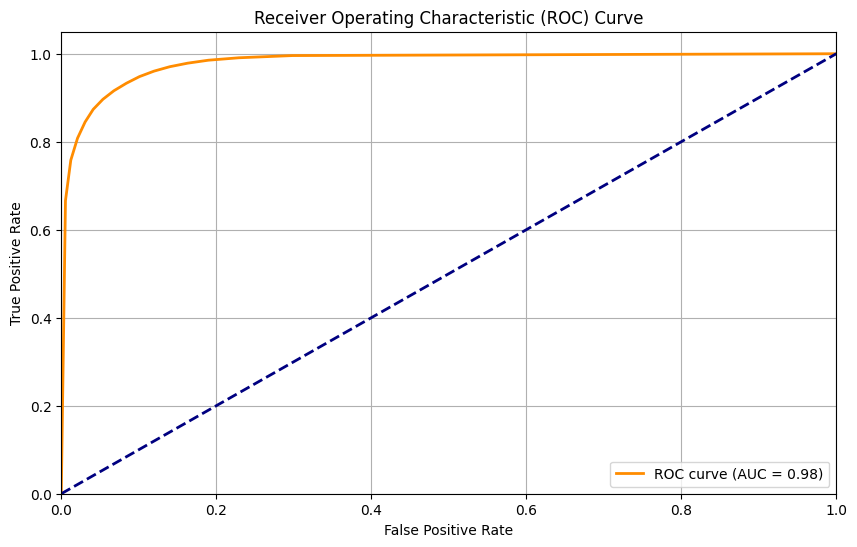

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predicted probabilities for positive class
probs = knn.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot Type 1 Error Rate against Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fpr, label='Type 1 Error Rate (False Positive Rate)')
plt.xlabel('Classification Threshold')
plt.ylabel('Error Rate')
plt.title('Type 1 Error Rate against Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Plot Type 2 Error Rate (False Negative Rate) against Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, 1 - tpr, label='Type 2 Error Rate (False Negative Rate)')
plt.xlabel('Classification Threshold')
plt.ylabel('Error Rate')
plt.title('Type 2 Error Rate against Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, probs))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Hyperparameter tuning

In [42]:
from sklearn.model_selection import GridSearchCV

subset_size = 300000

# Initialize KNN classifier
knn = KNeighborsClassifier()
# Cross-validation to tune 'k'
# If class 0 and 2 are also important, f1-macro, which is the average of the f1 score of all classes is preferred.
params = {'n_neighbors': list(range(1, 30))}
grid_search = GridSearchCV(estimator=knn, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "f1_macro", refit = True) # Refit an estimator using the best found parameters on the whole dataset. Save the step to refit after getting grid_search.best_estimator_

grid_search.fit(X_train_scaled[:subset_size], y_train[:subset_size])

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='f1_macro', verbose=1)

In [43]:
knn_best = grid_search.best_estimator_ 
knn_best

KNeighborsClassifier(n_neighbors=13)

### Predicting for test set

In [66]:
test_df = pd.read_csv('/Users/andrew/Downloads/UW courses/ECON 626/Prediction Competition 3/pc3_test_data_without_response_v1.csv')

In [67]:
drop = ['price', 'width', 'length', 'height', 'wheelbase', 'back_legroom', 'latitude', 'longitude', 'listed_date', 'exterior_color']
for col in drop:
    test_df = test_df.drop([col], axis=1)


In [68]:
data_cols = test_df.columns
for i in range(1,len(data_cols)):
    if test_df[data_cols[i]].isnull().values.any() == True:
        print(data_cols[i] + " has a nan value!")
    else:
       print(data_cols[i] + " does not have a nan value")

engine_displacement does not have a nan value
fuel_type does not have a nan value
highway_fuel_economy does not have a nan value
horsepower does not have a nan value
mileage does not have a nan value
wheel_system does not have a nan value
year does not have a nan value


In [69]:
col_encode = [ 'body_type', 'fuel_type', 'wheel_system']
for col in col_encode:
    print(test_df[col].value_counts() )

body_type
SUV / Crossover    44821
Sedan              31484
Pickup Truck        9999
Minivan             3487
Hatchback           3095
Coupe               3033
Wagon               2346
Convertible         1212
Van                  523
Name: count, dtype: int64
fuel_type
Gasoline                  91597
Flex Fuel Vehicle          5929
Hybrid                     1885
Diesel                      508
Biodiesel                    77
Compressed Natural Gas        4
Name: count, dtype: int64
wheel_system
FWD    47112
AWD    25602
4WD    16081
RWD     7869
4X2     3336
Name: count, dtype: int64


In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in col_encode:
    new_col = col+'_enc'
    test_df[new_col] = le.fit_transform(test_df[col])
    print(col, le.classes_)

body_type ['Convertible' 'Coupe' 'Hatchback' 'Minivan' 'Pickup Truck'
 'SUV / Crossover' 'Sedan' 'Van' 'Wagon']
fuel_type ['Biodiesel' 'Compressed Natural Gas' 'Diesel' 'Flex Fuel Vehicle'
 'Gasoline' 'Hybrid']
wheel_system ['4WD' '4X2' 'AWD' 'FWD' 'RWD']


In [71]:
drop = ['body_type', 'fuel_type', 'wheel_system']
for col in drop:
    test_df = test_df.drop([col], axis=1)

In [72]:
test_df['litres'] = (test_df['engine_displacement']/1000).astype(float)
test_df['litres']

0        6.2
1        3.5
2        2.0
3        2.0
4        6.2
        ... 
99995    6.2
99996    3.6
99997    3.5
99998    3.6
99999    1.6
Name: litres, Length: 100000, dtype: float64

In [73]:
test_df = test_df.drop(['engine_displacement'], axis=1)

In [74]:
y = []
X_final_test = test_df

In [75]:
test_df

,highway_fuel_economy,horsepower,mileage,year,body_type_enc,fuel_type_enc,wheel_system_enc,litres
0,20,420,33054,2017,4,4,0,6.2
1,24,278,18740,2019,4,4,1,3.5
2,29,237,7447,2020,5,4,0,2.0
3,30,240,99590,2014,5,4,2,2.0
4,26,460,18599,2017,1,4,4,6.2
...,...,...,...,...,...,...,...,...
99995,20,420,10097,2017,4,4,0,6.2
99996,24,290,54615,2015,5,4,0,3.6
99997,23,375,19929,2020,4,4,1,3.5
99998,25,283,38555,2019,3,3,3,3.6


In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler.fit(X_final_test)
# transform
X_final_scaled = min_max_scaler.transform(X_final_test)

final_pred_test = knn_best.predict(X_final_scaled)



In [77]:
predictions_df = pd.DataFrame({'predictions': final_pred_test})

header = pd.DataFrame({
    'predictions': [21108082, 'ItadoriYuji', 0.925]
})

header

output_df = pd.concat([header, predictions_df], axis=0)

output_df.to_csv('predictions_output.csv', index=False, header=False)

In [78]:
header

,predictions
0,21108082
1,ItadoriYuji
2,0.925
